In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
df = pd.read_csv('P2- OfficeSupplies Data.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OrderDate   43 non-null     object 
 1   Region      43 non-null     object 
 2   Rep         43 non-null     object 
 3   Item        43 non-null     object 
 4   Units       43 non-null     int64  
 5   Unit Price  43 non-null     float64
dtypes: float64(1), int64(1), object(4)
memory usage: 2.1+ KB


In [3]:
df.head(5)

,OrderDate,Region,Rep,Item,Units,Unit Price
0,04-Jul-14,East,Richard,Pen Set,62,4.99
1,12-Jul-14,East,Nick,Binder,29,1.99
2,21-Jul-14,Central,Morgan,Pen Set,55,12.49
3,29-Jul-14,East,Susan,Binder,81,19.99
4,07-Aug-14,Central,Matthew,Pen Set,42,23.95


### 1) Sales Analysis:
### a)What are the total sales for each product category?
### b)Which product category has the highest sales?
### c)Identify the top 10 best-selling products.

In [4]:
df['Total_Sale']=df['Units']*df['Unit Price']

In [5]:
df['Item'].unique()

array(['Pen Set', 'Binder', 'Pencil', 'Desk', 'Pen'], dtype=object)

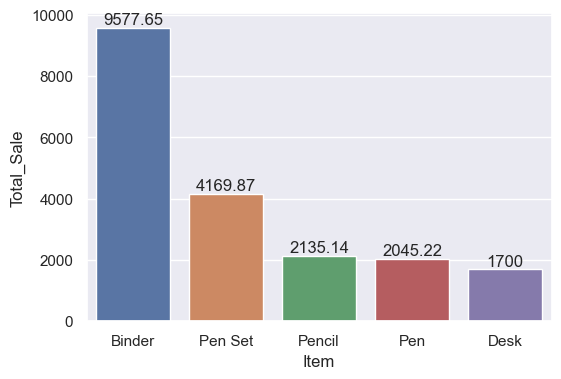

In [6]:
sales_Item=df.groupby('Item',as_index=False)['Total_Sale'].sum().sort_values(by='Total_Sale',ascending=False)
plt.figure(figsize=(6,4))
ax=sns.barplot(data=sales_Item,x='Item',y='Total_Sale',palette='deep',hue='Item')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

### 2.  Customer Analysis: 
#### a) What is the total number of unique customers?
#### b) Analyze customer purchase frequency.

In [7]:
df['Rep'].unique()

array(['Richard', 'Nick', 'Morgan', 'Susan', 'Matthew', 'James', 'Smith',
       'Bill', 'Thomas', 'Rachel', 'Alex'], dtype=object)

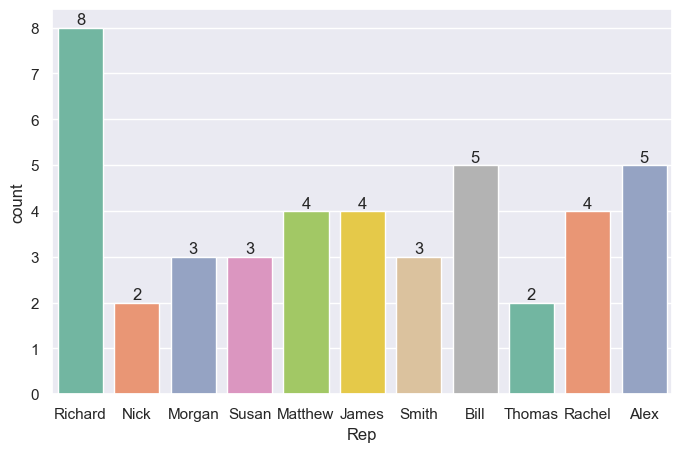

In [8]:
plt.figure(figsize=(8,5))
ax=sns.countplot(data=df,x='Rep',hue='Rep',palette='Set2')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

#### c) Who are the top 10 customers by sales?

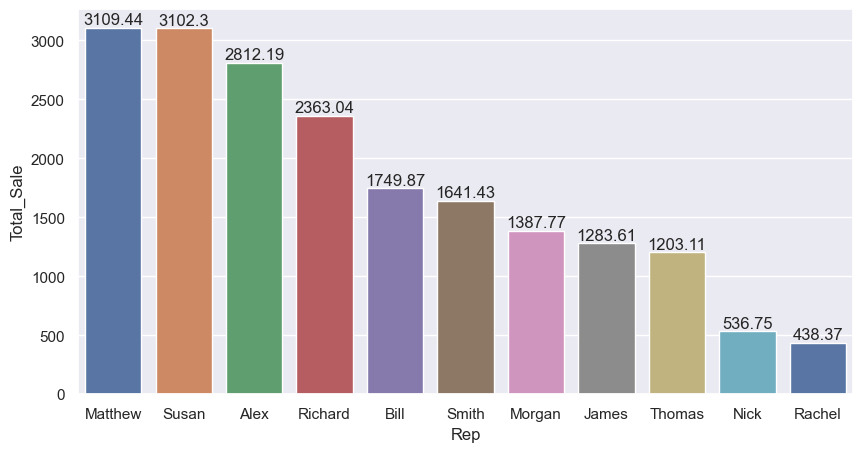

In [9]:
Total=df.groupby('Rep',as_index=False)['Total_Sale'].sum().sort_values(by='Total_Sale',ascending=False)
plt.figure(figsize=(10,5))
ax=sns.barplot(data=Total,x='Rep',y='Total_Sale',palette='deep',hue='Rep')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

### 3.  Time Series Analysis: 
- What are the monthly sales trends over the past year?
- Identify any seasonal patterns in the sales data.

In [10]:
df.head()

,OrderDate,Region,Rep,Item,Units,Unit Price,Total_Sale
0,04-Jul-14,East,Richard,Pen Set,62,4.99,309.38
1,12-Jul-14,East,Nick,Binder,29,1.99,57.71
2,21-Jul-14,Central,Morgan,Pen Set,55,12.49,686.95
3,29-Jul-14,East,Susan,Binder,81,19.99,1619.19
4,07-Aug-14,Central,Matthew,Pen Set,42,23.95,1005.90


In [11]:
df=(df.dropna()
.assign(OrderDate=pd.to_datetime(df["OrderDate"],format='mixed'))
.set_index("OrderDate")
.sort_index()
)

<Axes: title={'center': 'Time Series Analysis'}, xlabel='OrderDate', ylabel='Total Sales'>

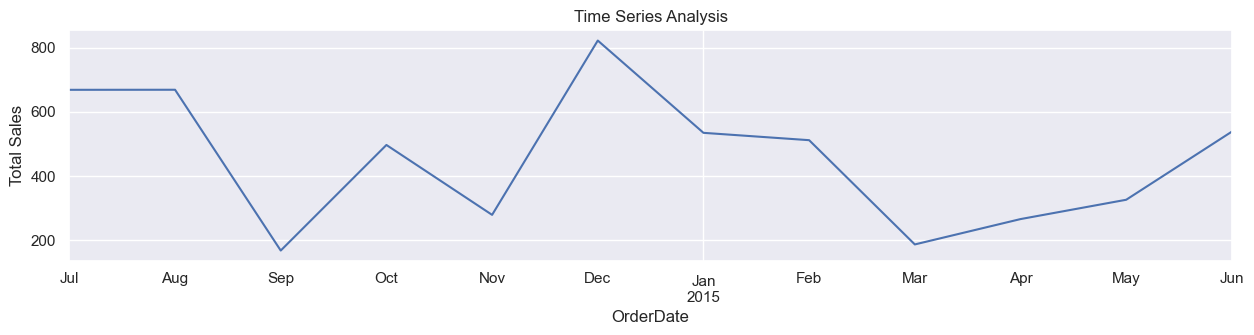

In [14]:
(df
 .Total_Sale
 .resample("ME")
 .mean()
 .plot(kind='line',figsize=(15,3), title="Time Series Analysis",ylabel='Total Sales')
)

### 4.  Geographical Analysis: 
#### a) Which regions generate the most sales?

In [15]:
df.Region.unique()

array(['East', 'Central', 'West'], dtype=object)

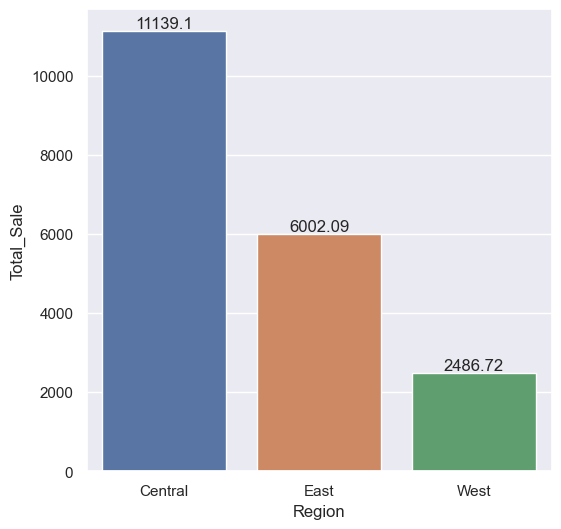

In [24]:
plt.figure(figsize=(6,6))
sums_by_region = df.groupby('Region')['Total_Sale'].sum().reset_index()
ax=sns.barplot(x='Region', y='Total_Sale', data=sums_by_region,hue='Region')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

#### b) What are the sales trends across different regions?

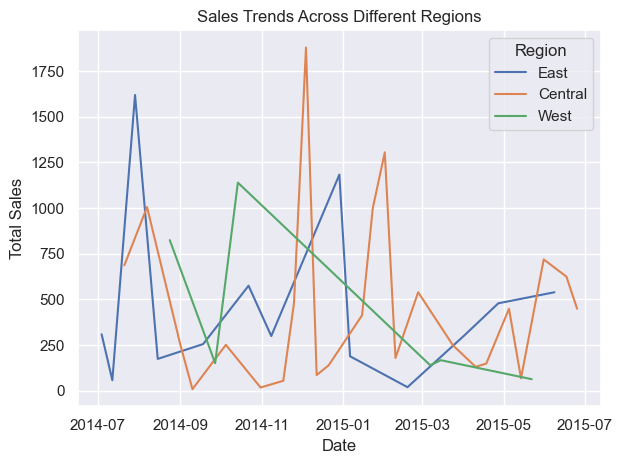

In [53]:
sns.lineplot(x='OrderDate',y='Total_Sale', hue='Region', data=df)
plt.title('Sales Trends Across Different Regions')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

### 5.  Profit Analysis: 
#### a) What is the total profit for each product category?
#### b) Identify the top 10 most profitable products.

In [54]:
df.head()

,Region,Rep,Item,Units,Unit Price,Total_Sale
OrderDate,,,,,,
2014-07-04,East,Richard,Pen Set,62,4.99,309.38
2014-07-12,East,Nick,Binder,29,1.99,57.71
2014-07-21,Central,Morgan,Pen Set,55,12.49,686.95
2014-07-29,East,Susan,Binder,81,19.99,1619.19
2014-08-07,Central,Matthew,Pen Set,42,23.95,1005.90


In [55]:
df['Item'].unique()

array(['Pen Set', 'Binder', 'Pencil', 'Desk', 'Pen'], dtype=object)

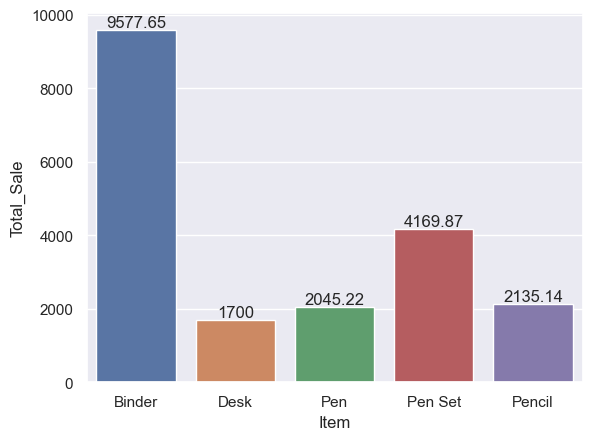

In [58]:
sums_by_product = df.groupby('Item')['Total_Sale'].sum().reset_index()
ax=sns.barplot(x='Item', y='Total_Sale', data=sums_by_product,hue='Item')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()